In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
def rate_quality(n):
  if n >= 6:
    return 1
  else:
    return 0
df['quality'] = df['quality'].apply(lambda x: rate_quality(x))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
df.shape

(1599, 12)

In [ ]:
#preprocessing data
#cleaning data
df_1 = df.drop_duplicates()
df_2 = df_1.dropna()
df_2.shape

(1359, 12)

In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaled_data = scaler.fit_transform(df_2)
df_2 = pd.DataFrame(scaled_data, columns=df_2.columns)
def change_val(n):
  if n > 0:
    return 1
  else:
    return 0
df_2['quality'] = df_2['quality'].apply(lambda x: change_val(x))
print(df_2)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.195153          0.018460     0.000000        0.050107   0.002004   
1          0.107241          0.012099     0.000000        0.035747   0.001347   
2          0.135457          0.013198     0.000695        0.039942   0.001598   
3          0.174346          0.004359     0.008717        0.029576   0.001167   
4          0.168468          0.015026     0.000000        0.040979   0.001707   
...             ...               ...          ...             ...        ...   
1354       0.139303          0.012701     0.001639        0.038923   0.001393   
1355       0.110886          0.010731     0.001431        0.035770   0.001610   
1356       0.089949          0.008385     0.001525        0.033540   0.000945   
1357       0.105669          0.011552     0.002149        0.035820   0.001343   
1358       0.125872          0.006503     0.009860        0.075523   0.001406   

      free sulfur dioxide  

In [ ]:
Q1_fa = df_2['fixed acidity'].quantile(0.25)
Q1_va = df_2['volatile acidity'].quantile(0.25)
Q1_ca = df_2['citric acid'].quantile(0.25)
Q1_rs = df_2['residual sugar'].quantile(0.25)
Q1_c = df_2['chlorides'].quantile(0.25)
Q1_fsd = df_2['free sulfur dioxide'].quantile(0.25)
Q1_tsd = df_2['total sulfur dioxide'].quantile(0.25)
Q1_d = df_2['density'].quantile(0.25)
Q1_ph = df_2['pH'].quantile(0.25)
Q1_s = df_2['sulphates'].quantile(0.25)
Q1_a = df_2['alcohol'].quantile(0.25)

Q3_fa = df_2['fixed acidity'].quantile(0.75)
Q3_va = df_2['volatile acidity'].quantile(0.75)
Q3_ca = df_2['citric acid'].quantile(0.75)
Q3_rs = df_2['residual sugar'].quantile(0.75)
Q3_c = df_2['chlorides'].quantile(0.75)
Q3_fsd = df_2['free sulfur dioxide'].quantile(0.75)
Q3_tsd = df_2['total sulfur dioxide'].quantile(0.75)
Q3_d = df_2['density'].quantile(0.75)
Q3_ph = df_2['pH'].quantile(0.75)
Q3_s = df_2['sulphates'].quantile(0.75)
Q3_a = df_2['alcohol'].quantile(0.75)

IQR_fa = Q3_fa - Q1_fa
IQR_va = Q3_va - Q1_va
IQR_ca = Q3_ca - Q1_ca
IQR_rs = Q3_rs - Q1_rs
IQR_c = Q3_c - Q1_c
IQR_fsd = Q3_fsd - Q1_fsd
IQR_tsd = Q3_tsd - Q1_tsd
IQR_d = Q3_d - Q1_d
IQR_ph = Q3_ph - Q1_ph
IQR_s = Q3_s - Q1_s
IQR_a = Q3_a - Q1_a

lower_limit_fa = Q1_fa - 1.5*IQR_fa
upper_limit_fa = Q3_fa + 1.5*IQR_fa

lower_limit_va = Q1_va - 1.5*IQR_va
upper_limit_va = Q3_va + 1.5*IQR_va

lower_limit_ca = Q1_ca - 1.5*IQR_ca
upper_limit_ca = Q3_ca + 1.5*IQR_ca

lower_limit_rs = Q1_rs - 1.5*IQR_rs
upper_limit_rs = Q3_rs + 1.5*IQR_rs

lower_limit_c = Q1_c - 1.5*IQR_c
upper_limit_c = Q3_c + 1.5*IQR_c

lower_limit_fsd = Q1_fsd - 1.5*IQR_fsd
upper_limit_fsd = Q3_fsd + 1.5*IQR_fsd

lower_limit_tsd = Q1_tsd - 1.5*IQR_tsd
upper_limit_tsd = Q3_tsd + 1.5*IQR_tsd

lower_limit_d = Q1_d - 1.5*IQR_d
upper_limit_d = Q3_d + 1.5*IQR_d

lower_limit_ph = Q1_ph - 1.5*IQR_ph
upper_limit_ph = Q3_ph + 1.5*IQR_ph

lower_limit_s = Q1_s - 1.5*IQR_s
upper_limit_s = Q3_s + 1.5*IQR_s

lower_limit_a = Q1_a - 1.5*IQR_a
upper_limit_a = Q3_a + 1.5*IQR_a

In [ ]:
#after removing outliers from each column
df_3 = df_2[((df_2['fixed acidity'] > lower_limit_fa)&(df_2['fixed acidity'] < upper_limit_fa))]
df_4 = df_3[((df_2['volatile acidity'] > lower_limit_va)& (df_2['volatile acidity'] < upper_limit_va))]
df_5 = df_4[((df_2['citric acid'] > lower_limit_ca)& (df_2['citric acid'] < upper_limit_ca))]
df_6 = df_5[((df_2['residual sugar'] > lower_limit_rs)& (df_2['residual sugar'] < upper_limit_rs))]
df_7 = df_6[((df_2['chlorides'] > lower_limit_c)&( df_2['chlorides'] < upper_limit_c))]
df_8 = df_7[((df_2['free sulfur dioxide'] > lower_limit_fsd)& (df_2['free sulfur dioxide'] < upper_limit_fsd))]
df_9 = df_8[((df_2['total sulfur dioxide'] > lower_limit_tsd)& (df_2['total sulfur dioxide'] < upper_limit_tsd))]
df_10 = df_9[ ((df_2['density'] > lower_limit_d)& (df_2['density'] < upper_limit_d))]
df_11 = df_10[((df_2['pH'] > lower_limit_ph)&(df_2['pH'] < upper_limit_ph))]
df_12 = df_11[((df_2['sulphates'] > lower_limit_s)&(df_2['sulphates'] < upper_limit_s))]
df_13 = df_12[ ((df_2['alcohol'] > lower_limit_a)&(df_2['alcohol'] < upper_limit_a))]

<ipython-input-56-f862323226cb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_4 = df_3[((df_2['volatile acidity'] > lower_limit_va)& (df_2['volatile acidity'] < upper_limit_va))]
<ipython-input-56-f862323226cb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_5 = df_4[((df_2['citric acid'] > lower_limit_ca)& (df_2['citric acid'] < upper_limit_ca))]
<ipython-input-56-f862323226cb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_6 = df_5[((df_2['residual sugar'] > lower_limit_rs)& (df_2['residual sugar'] < upper_limit_rs))]
<ipython-input-56-f862323226cb>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_7 = df_6[((df_2['chlorides'] > lower_limit_c)&( df_2['chlorides'] < upper_limit_c))]
<ipython-input-56-f862323226cb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_8 = df_7[((df_2['free sulfur dioxide'] > lower

In [ ]:
df_13

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.195153,0.018460,0.000000,0.050107,0.002004,0.290092,0.896647,0.026314,0.092566,0.014768,0.247896,0
1,0.107241,0.012099,0.000000,0.035747,0.001347,0.343722,0.921175,0.013705,0.043996,0.009349,0.134739,0
2,0.135457,0.013198,0.000695,0.039942,0.001598,0.260494,0.937777,0.017314,0.056614,0.011288,0.170189,0
3,0.174346,0.004359,0.008717,0.029576,0.001167,0.264632,0.933994,0.015535,0.049190,0.009029,0.152552,1
4,0.168468,0.015026,0.000000,0.040979,0.001707,0.295957,0.910637,0.022716,0.079908,0.012749,0.214000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0.139303,0.012701,0.001639,0.038923,0.001393,0.573600,0.778457,0.020414,0.070061,0.016798,0.194614,1
1355,0.110886,0.010731,0.001431,0.035770,0.001610,0.572315,0.786933,0.017794,0.061703,0.010373,0.187791,0
1356,0.089949,0.008385,0.001525,0.033540,0.000945,0.594581,0.777529,0.015171,0.053665,0.011587,0.170751,1
1357,0.105669,0.011552,0.002149,0.035820,0.001343,0.573119,0.788039,0.017829,0.063939,0.012716,0.182682,0


In [ ]:
#making correlation amtrix and seeing relation between target variable and other variables
df_13.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.646095,0.709889,0.765106,0.834788,-0.026138,-0.775940,0.904707,0.867181,0.862138,0.875557,0.195940
volatile acidity,0.646095,1.000000,0.065483,0.637557,0.727550,0.039349,-0.618128,0.795376,0.808100,0.644043,0.751732,-0.010292
citric acid,0.709889,0.065483,1.000000,0.473112,0.473360,-0.113914,-0.451946,0.495073,0.443274,0.553015,0.513742,0.219544
residual sugar,0.765106,0.637557,0.473112,1.000000,0.744827,-0.011320,-0.665240,0.785723,0.775366,0.721572,0.783242,0.149015
chlorides,0.834788,0.727550,0.473360,0.744827,1.000000,-0.016590,-0.696629,0.878200,0.865862,0.804346,0.835080,0.108539
free sulfur dioxide,-0.026138,0.039349,-0.113914,-0.011320,-0.016590,1.000000,-0.469275,0.050063,0.068161,0.060841,0.079214,0.212203
total sulfur dioxide,-0.775940,-0.618128,-0.451946,-0.665240,-0.696629,-0.469275,1.000000,-0.839291,-0.834754,-0.784260,-0.865121,-0.272571
density,0.904707,0.795376,0.495073,0.785723,0.878200,0.050063,-0.839291,1.000000,0.994993,0.905775,0.977007,0.181451
pH,0.867181,0.808100,0.443274,0.775366,0.865862,0.068161,-0.834754,0.994993,1.000000,0.897607,0.976040,0.179528
sulphates,0.862138,0.644043,0.553015,0.721572,0.804346,0.060841,-0.784260,0.905775,0.897607,1.000000,0.899268,0.296004


<Axes: >

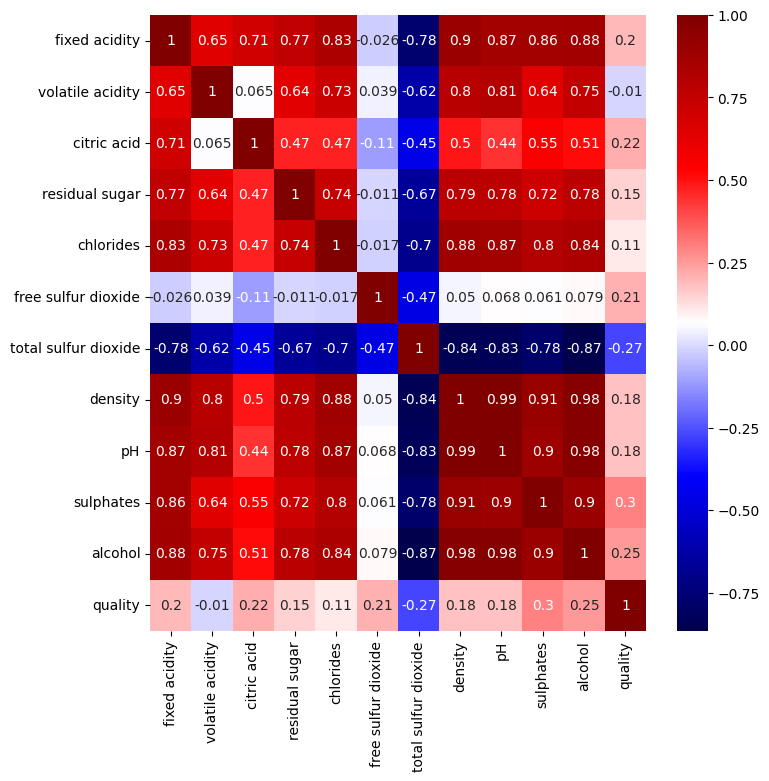

In [ ]:
#plotting heatmap
corr = df_13.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr,annot = True,cmap ='seismic')

In [ ]:
#from above heatmap we observe quality is directly related to alcohol and sulphate and undirectly related to all other aspects

In [ ]:
from sklearn.model_selection import train_test_split
input_var = df_13.drop('quality',axis = 1)
target_var = df_13['quality']
X_train,X_test,y_train,y_test = train_test_split(input_var,target_var,test_size = 0.3,random_state = 46)

In [ ]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
dtm = decision_tree_model.fit(X_train,y_train)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

print('accurracy for decision tree:',accuracy)
print('f1score for decision tree : ',f1score)

accurracy for decision tree: 0.6329479768786127
f1score for decision tree :  0.6340057636887607


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train,y_train)
y_pred =rf_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print('accurracy for random forest:',accuracy)
print('f1score for random forest: ',f1score)

accurracy for random forest: 0.7225433526011561
f1score for random forest:  0.7405405405405405
